In [1]:
import pandas as pd
import pyagrum as gum
import pyagrum.lib.notebook as gnb
from pyagrum.lib.bn2roc import showROC_PR
import pyagrum.lib.dynamicBN as gdyn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.curdir, '..', 'lib')))

import ktbn
import ktbn_learner

In [3]:
train = pd.read_csv("data/DailyDelhiClimateTrain.csv")

# Visualisation des données

In [4]:
train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [5]:
train = train[(980 < train['meanpressure']) & (train['meanpressure'] < 1200)]

# Data preprocessing

In [6]:
def discret_temp(temp):

    for i in range(10,31,5):

        if temp < i:

            return i
    
    return 35

In [7]:
def discret_wind(speed):
    
    if speed < 5:
        return 0
    if speed < 10: 
        return 1
    if speed < 20:
        return 2
    return 3

In [8]:
def discretize_column(df, column):

    med = df[column].median()
    std = df[column].std()
    
    bins = [-np.inf, med - 1.5*std, med - 0.5*std, med + 0.5*std, med + 1.5*std, np.inf]
    
    labels = [-2, -1, 0, 1, 2]
    
    return pd.cut(df[column], bins=bins, labels=labels)

In [9]:
train['meantemp'] = train['meantemp'].apply(discret_temp)
train['wind_speed'] = train['wind_speed'].apply(discret_wind)
train['humidity'] = discretize_column(train, 'humidity')
train['meanpressure'] = discretize_column(train, 'meanpressure')

In [10]:
k = 2
cols = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
lags, firsts = ktbn_learner.create_sequences([train[cols]],k, '_')
lags

,meantemp_0,humidity_0,wind_speed_0,meanpressure_0,meantemp_1,humidity_1,wind_speed_1,meanpressure_1
0,15,1,0,1,10,2,0,1
1,10,2,0,1,10,1,0,1
2,10,1,0,1,10,1,0,1
3,10,1,0,1,10,1,0,1
4,10,1,0,1,10,1,0,1
...,...,...,...,...,...,...,...,...
1447,20,0,1,1,20,0,0,1
1448,20,0,0,1,20,2,1,1
1449,20,2,1,1,15,2,1,1
1450,15,2,1,1,20,1,1,1


In [11]:
dfs = [train[cols].iloc[i:i+10] for i in range(140)]

# Apprentissage

In [18]:
dbn = ktbn_learner.learn_ktbn(dfs,5,';')

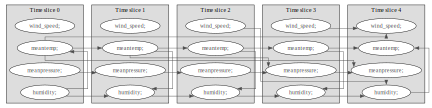

In [19]:
gdyn.showTimeSlices(dbn)